# Start-up

In [24]:
import sys
import time
from numpy import *
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from control_hugo import red_pitaya_control,red_pitaya_app
import socket
import struct

AppName = "lock_in+pid_for_qudi"
rp_ip = 'rp-f0a83e.local'
port = 22
filename = "test.npz"
pwd = 'quantuM2015'

rp=red_pitaya_app(AppName=AppName,host=rp_ip,port=port,filename=filename,password=pwd)

auth method: pass
Remote Command: uname -a
Remote Command: echo $SSH_CONNECTION
Error detecting local IPv4 address: str, bytes or bytearray expected, not NoneType
rp.osc.load(): /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/osc.py
Remote Command: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/osc.py
rp.lock_in+pid_for_qudi.load(): /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/lock.py
Remote Command: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/lock.py
Remote Command: cat /opt/redpitaya/www/apps/lock_in+pid_for_qudi/index.html
Remote Command: /opt/redpitaya/bin/calib -r -v


In [ ]:
rp.ssh.close()

In [2]:
print(rp.check_connection())

Remote Command: uname -a
Remote Command: echo $SSH_CONNECTION
True


# Example

In [ ]:
import logging
logging.basicConfig()
logging.getLogger("paramiko").setLevel(logging.WARNING)
rp.verbose = False

In [ ]:
# Set params
rp.lock.ramp_step = 1000
rp.lock.ramp_low_lim = 0
rp.lock.ramp_hig_lim = 8191
rp.lock.ramp_enable = 1
rp.lock.out2_sw = 12

rp.lock.oscA_sw = 1
rp.lock.oscB_sw = 2
rp.lock.trig_sw = 8

rp.get_adc_dac_calib()

trigger_type = 6  # 6 is external, 1 is manual

In [ ]:
# Decimation only allows this values: 1,8,64, 1024, 8192, 65536
# The oscilloscope data points will be separated by 2^(dec-1) * 8 ns
dec = 1 # [1,8,64, 1024, 8192, 65536]

rp.osc_trig_fire(trig=trigger_type,dec=dec)
sleep(dec *8e-9*2**14 + 0.2)
rp.get_curv(log='ruido info' )

rp.save()

In [ ]:
# Access last acquisition values
ch1_val = mean( rp.data[-1][2]['ch1'])
ch1_err =  std( rp.data[-1][2]['ch1'])

ch2_val = mean( rp.data[-1][2]['ch2'])
ch2_err =  std( rp.data[-1][2]['ch2'])

ch1_act = (ch1_val + rp.calib_params['FE_CH1_DC_offs'])*float(rp.calib_params['FE_CH1_FS_G_HI'])/2**32*100/8192
ch2_act = (ch2_val + rp.calib_params['FE_CH2_DC_offs'])*float(rp.calib_params['FE_CH2_FS_G_HI'])/2**32*100/8192


In [ ]:
# plot last acquisition
rp.plot(num=0)

In [ ]:
rp.get_adc_dac_calib()

print(repr(rp.calib_params))

In [ ]:
rp.plot(num=1)

In [ ]:
rp.plot(num=-1)

# Test Real-time acquisition

## Single acquisitions

In [25]:
rp.get_curv()

Remote Command: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/osc_get_ch.py
rp.get_curv(): /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/osc_get_ch.py | 
rp.osc.load(): /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/osc.py
Remote Command: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/osc.py
rp.lock_in+pid_for_qudi.load(): /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/lock.py
Remote Command: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/lock.py


In [26]:
len(rp.data)

1

In [27]:
latest_acq = rp.data[-1]
latest_acq_number = latest_acq[0]
latest_acq_time = latest_acq[1]
latest_acq_data = latest_acq[2]
print("Acq_num: ",latest_acq_number,"  | Timestamp: ",datetime.fromtimestamp(latest_acq_time))

Acq_num:  0   | Timestamp:  2025-02-07 13:55:26.181406


In [28]:
t_idx = latest_acq_data['i']
print("Time data: ",t_idx)

Time data:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [29]:
ch1 = latest_acq_data['ch1']
print("Ch. 1 data: ",ch1)

Ch. 1 data:  [2856, 2848, 2840, 2834, 2826, 2818, 2812, 2804, 2796, 2790, 2782, 2774, 2766, 2760, 2752, 2744, 2736, 2728, 2722, 2714, 2706, 2698, 2690, 2682, 2674, 2668, 2660, 2652, 2644, 2636, 2628, 2620, 2612, 2604, 2596, 2588, 2582, 2574, 2566, 2558, 2550, 2542, 2534, 2526, 2518, 2510, 2500, 2492, 2484, 2476, 2468, 2460, 2452, 2444, 2436, 2428, 2420, 2412, 2402, 2394, 2386, 2378, 2370, 2362, 2352, 2344, 2336, 2328, 2320, 2312, 2302, 2294, 2286, 2278, 2268, 2260, 2252, 2244, 2234, 2226, 2218, 2208, 2200, 2192, 2183, 2174, 2166, 2158, 2148, 2140, 2130, 2122, 2114, 2104, 2096, 2088, 2078, 2070, 2059, 2052, 2043, 2034, 2025, 2016, 2008, 1998, 1990, 1980, 1972, 1962, 1954, 1944, 1936, 1926, 1918, 1908, 1900, 1890, 1882, 1872, 1864, 1854, 1846, 1836, 1828, 1818, 1808, 1800, 1790, 1782, 1772, 1762, 1754, 1744, 1736, 1726, 1716, 1708, 1698, 1688, 1680, 1670, 1660, 1652, 1642, 1632, 1624, 1614, 1604, 1596, 1586, 1576, 1568, 1558, 1548, 1538, 1530, 1520, 1510, 1500, 1492, 1482, 1472, 1462, 14

In [30]:
ch2 = latest_acq_data['ch2']
print("Ch. 2 data: ",ch2)

Ch. 2 data:  [1040, 1020, 1000, 980, 960, 942, 922, 902, 882, 862, 842, 822, 802, 782, 762, 742, 722, 702, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 478, 458, 438, 418, 398, 378, 356, 336, 316, 296, 276, 256, 234, 214, 194, 174, 154, 132, 112, 92, 72, 52, 30, 10, -10, -30, -52, -72, -92, -112, -132, -154, -174, -194, -214, -234, -256, -276, -296, -316, -336, -356, -378, -398, -418, -438, -458, -478, -500, -520, -540, -560, -580, -600, -620, -640, -660, -680, -702, -722, -742, -762, -782, -802, -822, -842, -862, -882, -902, -922, -942, -960, -980, -1000, -1020, -1040, -1060, -1080, -1100, -1118, -1138, -1158, -1178, -1198, -1216, -1236, -1256, -1276, -1294, -1314, -1334, -1352, -1372, -1390, -1410, -1430, -1448, -1468, -1486, -1506, -1524, -1544, -1562, -1582, -1600, -1618, -1638, -1656, -1674, -1694, -1712, -1730, -1750, -1768, -1786, -1804, -1822, -1840, -1860, -1878, -1896, -1914, -1932, -1950, -1968, -1986, -2004, -2020, -2038, -2056, -2074, -2092, -2110, -2126, -2144, -2162

In [31]:
dec = latest_acq_data['dec']
tau = 8*2**latest_acq_data['dec']
t = [x * tau for x in t_idx]
print(t)

[0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400, 416, 432, 448, 464, 480, 496, 512, 528, 544, 560, 576, 592, 608, 624, 640, 656, 672, 688, 704, 720, 736, 752, 768, 784, 800, 816, 832, 848, 864, 880, 896, 912, 928, 944, 960, 976, 992, 1008, 1024, 1040, 1056, 1072, 1088, 1104, 1120, 1136, 1152, 1168, 1184, 1200, 1216, 1232, 1248, 1264, 1280, 1296, 1312, 1328, 1344, 1360, 1376, 1392, 1408, 1424, 1440, 1456, 1472, 1488, 1504, 1520, 1536, 1552, 1568, 1584, 1600, 1616, 1632, 1648, 1664, 1680, 1696, 1712, 1728, 1744, 1760, 1776, 1792, 1808, 1824, 1840, 1856, 1872, 1888, 1904, 1920, 1936, 1952, 1968, 1984, 2000, 2016, 2032, 2048, 2064, 2080, 2096, 2112, 2128, 2144, 2160, 2176, 2192, 2208, 2224, 2240, 2256, 2272, 2288, 2304, 2320, 2336, 2352, 2368, 2384, 2400, 2416, 2432, 2448, 2464, 2480, 2496, 2512, 2528, 2544, 2560, 2576, 2592, 2608, 2624, 2640, 2656, 2672, 2688, 2704, 2720, 2736, 2752, 2768, 2784, 2800, 2816, 2832, 28

In [32]:
print("dec:",dec,"=> Tau: ",tau,"ns")

dec: 1 => Tau:  16 ns


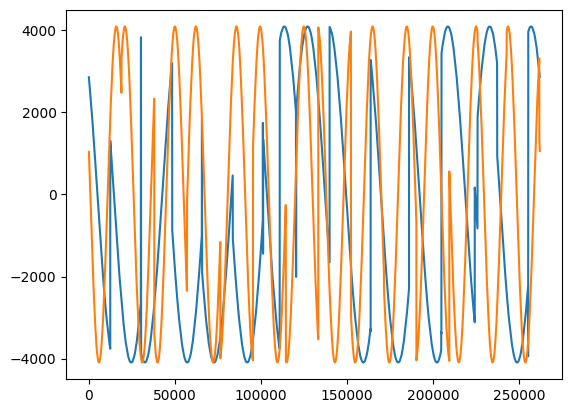

In [33]:
plt.plot(t,ch1)
plt.plot(t,ch2)

## Stream

In [7]:
# Start streaming specific signals
rp.start_streaming(signals='in1 in2')

# Collect data for a while (e.g., 10 seconds)
# time.sleep(10)

# Stop streaming when done
# rp.stop_streaming()

Getting streaming for [in1 in2]
start_streaming(): Getting streaming for [in1 in2]
start_streaming():
rp_ip: 134.60.243.125
local_ip:  134.60.243.151 

cmd:  /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/data_dump.py  -s 134.60.243.151 -p 6000 --params in1 in2 

start_streaming(): filename=20250204_151948_dump.bin
remote: /opt/redpitaya/www/apps/lock_in+pid_for_qudi/py/data_dump.py  -s 134.60.243.151 -p 6000 --params in1 in2


In [15]:
rp.stop_streaming()

Streaming never started


In [23]:
HOST = "0.0.0.0"  # Listen on all available interfaces
PORT = 6000
FORMAT = "!hh"  # Each row consists of two short values
NUM_ROWS = 16 * 1024  # 16K rows
PACKAGE_SIZE = NUM_ROWS * struct.calcsize(FORMAT)  # Total bytes

# print(f"Expecting {PACKAGE_SIZE} bytes for the full dataset.")

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.bind((HOST, PORT))
    s.listen(1)  # Allow one connection
    print(f"Listening on port {PORT}...")

    connection, client_address = s.accept()
    print(f"Connection from {client_address}")

    data = b""
    while len(data) < PACKAGE_SIZE:
        chunk = connection.recv(PACKAGE_SIZE - len(data))
        if not chunk:
            break  # Connection closed
        data += chunk

    if len(data) == PACKAGE_SIZE:
        unpacked_data = struct.unpack(f"!{NUM_ROWS*2}h", data)

        # Convert to a NumPy matrix with 2 columns (chA and chB)
        matrix = np.array(unpacked_data, dtype=np.int16).reshape(NUM_ROWS, 2)
        print(f"Received matrix shape: {matrix.shape}")

    print("Reception complete. Exiting.")

Listening on port 6000...
Connection from ('134.60.243.125', 38014)
Received matrix shape: (16384, 2)
Reception complete. Exiting.


In [19]:
len(matrix)

16384

In [20]:
matrix[:,0]

array([ 1708,  1698,  1688, ..., -1698, -1688, -1680], dtype=int16)

In [21]:
t = np.arange(0, 16384 * 0.128, 0.128)
ch1 = matrix[:,0]
ch2 = matrix[:,1]

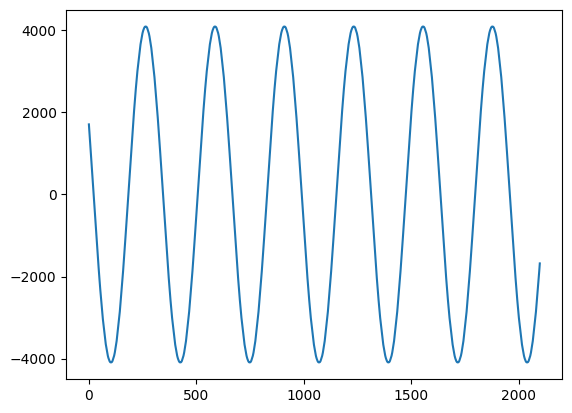

In [22]:
plt.plot(t,ch1)
# plt.xlim(0,100)

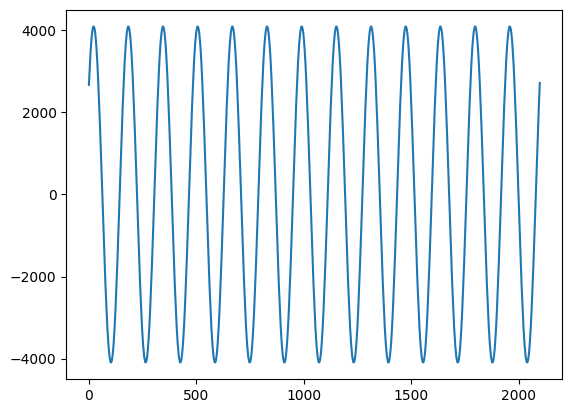

In [17]:
plt.plot(t,ch2)
# plt.xlim(0,100)

In [47]:
2e-3

0.002